<h2><center>CSCI-UA 9473 Summer 2022, Introduction to Machine Learning </center></h2>

<h3><center>Assignment 1: Linear regression
 </center></h3>



__Given date:__ June 3

__Due date:__ June 10

__Total:__ 15pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red on the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initializations.  

/var/folders/d8/1qtrdb3j0vd5186cj_41jbhh0000gn/T/ipykernel_10263/3666497020.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


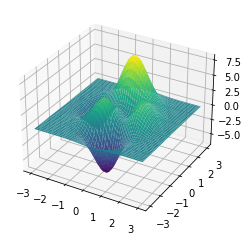

In [10]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()


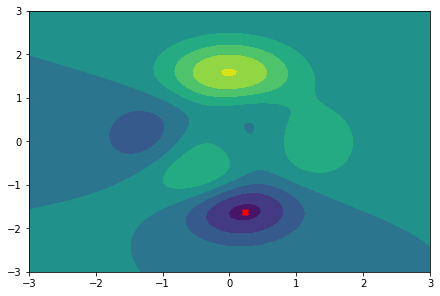

In [12]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

In [13]:
# put your solution here

#number of iteration
maxIter=10000

#learning rate
learning_rate=0.01

currentIter = 0

#randomly generate the initial point
x1temp = [np.random.rand() * 6 - 3]
x2temp = [np.random.rand() * 6 - 3]

    
    # gradient with respect to x and y
    grad_x=-2*np.exp(-(x1temp[-1]**2)/3-2*(x1temp[-1])-(x2temp[-1]+1)**2)*(np.exp(2*(x1temp[-1])+2*(x2temp[-1])+1)*(30*(x1temp[-1]**4)-51*(x1temp[-1]**2)+30*x1temp[-1]*(x2temp[-1]**5)+3)+9*np.exp(2*x1temp[-1])*(x1temp[-1]**3-2*(x1temp[-1]**2)+1)+(x1temp[-1]+1)*(-np.exp(2*x2temp[-1])))
    grad_y=1/3*np.exp(-x1temp[-1]**2-2*x1temp[-1]-(x2temp[-1]+1)**2)*(-6*x2temp[-1]*np.exp(2*x1temp[-1]+2*x2temp[-1]+1)*(10*(x1temp[-1]**3)-2*x1temp[-1]+10*(x2temp[-1]**5)-25*(x2temp[-1]**3))-18*np.exp(2*x1temp[-1])*((1-x1temp[-1])**2)*(x2temp[-1]+1)+2*np.exp(2*x2temp[-1])*x2temp[-1])
    
    x1temp.append(x1temp[-1]-learning_rate*grad_x)
    x2temp.append(x2temp[-1]-learning_rate*grad_y)
    
    #paint each step
    fig1, ax = plt.subplots(constrained_layout=True)
    contour = ax.contourf(x1, x2, F,cmap = 'viridis')
    plt.plot(x1temp,x2temp,c='w')
    plt.scatter(0.23, -1.62,c='r',marker='X')
    plt.show()
    currentIter += 1

#final path
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.plot(x1temp,x2temp,c='w')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

IndentationError: unexpected indent (1710412607.py, line 17)

### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


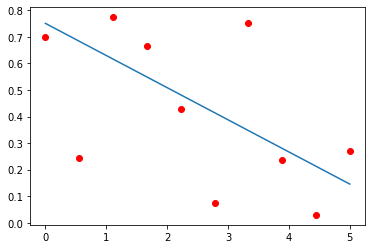

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

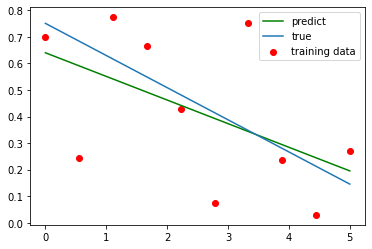

In [11]:
from numpy.linalg import inv

# defining xtilde matrix
Xtilde = np.vstack((np.ones(len(x)),x)).T
Xtilde_T = Xtilde.T

# the first and second term for OLS
xx1 = np.matmul(Xtilde_T,Xtilde)
xx2 = np.matmul(Xtilde_T,tnoisy.T)
beta_1 = np.matmul(np.linalg.inv(xx1),xx2)

predict = beta_1[0] + beta_1[1] * x

# print(beta_1)
plt.plot(x,predict, c = 'g')
plt.plot(x, t)
plt.scatter(x, tnoisy, c='r')
plt.legend(['predict', 'true', 'training data'])
plt.show()

### Question 3 [5pts]. 

We now want to learn a linear model that minimizes an $\ell_1$ penalty such as in LASSO. We consider the following dataset

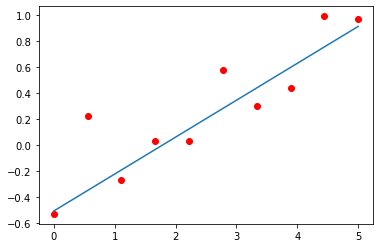

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

Such a dataset can obviously be perfectly (up to the noise) captured by a single feature. In order to study the efficiency of the LASSO, we will instead assume no knowledge on the original distribution of the data and consider a general degree 5 model (i.e. defined on polynomial features $1, x, x^2, x^3, x^4, x^5$). 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

mypoly = PolynomialFeatures(5)

x = np.linspace(0,5,10)

Xtilde = mypoly.fit_transform(x.reshape(-1,1))

Our feature vectors are thus 5-dimensional and we would like to recover the single meaningful feature by relying on the LASSO formulation. To this aim, we consider proximal gradient steps. That is to say, steps of the form

\begin{align*}
\boldsymbol \beta^{k+1} = \mathcal{S}_{\eta \lambda} \left(\beta^{k} + \eta \frac{1}{N} \boldsymbol X^T(\boldsymbol t - \boldsymbol X\beta^{k})\right)
\end{align*}

Here the soft thresholding operator $\mathcal{S}_{\eta\lambda}$ is defined component-wise (for a step size $\eta$ and a penalty weight $\lambda$) as 

\begin{align*}
[\mathcal{S}_{\lambda\eta}(z)]_j = \text{sign}(z_j)(|z_j| - \lambda\eta)_+
\end{align*}

$(x)_+$ denoting the positive part of $x$, $(x)_+ = \max(x, 0)$. 

__Question 3a [4pts].__ Complete the function 'proximal_gradient_lasso' below so that it takes the weight $\lambda$ and a stepsize $\eta$, along with the data matrices $\boldsymbol X$ and $\boldsymbol t$ as arguments and return the minimizer of the LASSO loss

\begin{align*}
\ell_{\text{LASSO}}(\beta) = \frac{1}{N}\sum_{i=1}^N (t^{(i)} - \beta^T\tilde{\boldsymbol x}^{(i)})^2 + \lambda \sum_{j=1}^D |\beta_j|
\end{align*}

Evaluate your function on the dataset given above for the degree 5 feature vector and study the evolution of the solution (in particular the number of non zero features) as a function of the penalty weight $\lambda$. 

In [14]:
def proximal_gradient_lasso(X, t, eta, lbda):
    
    '''The function should take the feature 
    matrix X and target vector t as inputs together with 
    the penalty weight lbda and step size eta and return the solution 
    of the  LASSO'''
    maxIter = 100
    currentIter = 0
    
    N = len(X)
    
    # beta = np.ones((6, 1))
    beta = np.random.rand(6,)
    beta_LASSO=np.random.rand(6,)
    
    print(beta)

    t_sum = 0
    while currentIter < maxIter:
        z = beta + eta * (1/N) * np.matmul(X.T, t.reshape(-1, 1) - np.matmul(X, beta.reshape(-1, 1)))
        currentIter += 1
        
    for i in range(X.shape[0]):
        beta_LASSO += ((1/N) * ((t[i] -np.matmul(X[i],beta.reshape(-1,1)))**2))
        
    beta_LASSO +=lbda* t_sum    
    return beta_LASSO

__Question 3b [1pt].__ plot the resulting models for the various values of $\lambda$ on top of the original data and true model (in blue)

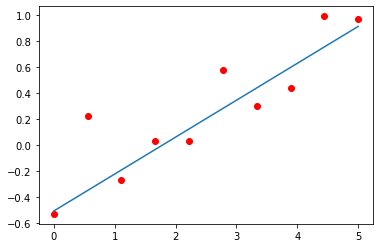

In [15]:
plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

[0.16182576 0.9418336  0.78198466 0.6490139  0.74708134 0.51901371]


<function matplotlib.pyplot.show(close=None, block=None)>

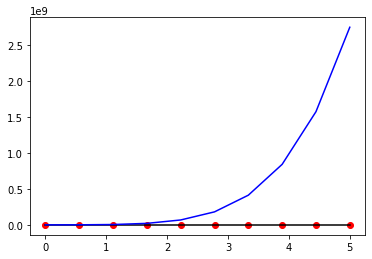

In [16]:
eta = 0.01
lbda = 1
para = proximal_gradient_lasso(Xtilde, tnoisy, eta, lbda)
predict = np.matmul(Xtilde, para)

plt.scatter(x, tnoisy, c = 'r')
plt.plot(x, t, c = 'k')
plt.plot(x, predict, c = 'b')
plt.show

[0.4491211  0.05633688 0.55928042 0.64387471 0.66921537 0.11614246]


<function matplotlib.pyplot.show(close=None, block=None)>

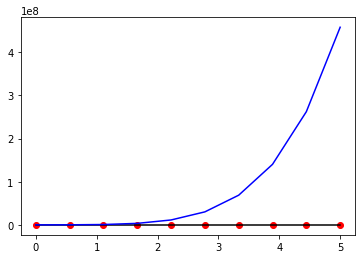

In [17]:
eta = 0.01
lbda = 5
para = proximal_gradient_lasso(Xtilde, tnoisy, eta, lbda)
predict = np.matmul(Xtilde, para)

plt.scatter(x, tnoisy, c = 'r')
plt.plot(x, t, c = 'k')
plt.plot(x, predict, c = 'b')
plt.show

[0.11531921 0.49848586 0.08178527 0.07651392 0.55957059 0.88750512]


<function matplotlib.pyplot.show(close=None, block=None)>

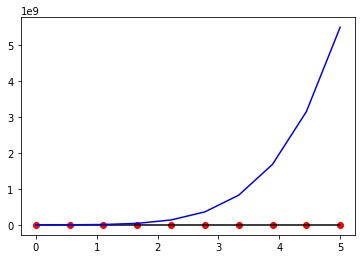

In [18]:
eta = 0.01
lbda = 0.003
para = proximal_gradient_lasso(Xtilde, tnoisy, eta, lbda)
predict = np.matmul(Xtilde, para)

plt.scatter(x, tnoisy, c = 'r')
plt.plot(x, t, c = 'k')
plt.plot(x, predict, c = 'b')
plt.show